In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# package use to convert string to other datatype e.g. list, dict, ...
import ast
# Packages for generating polygon
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import warnings
warnings.filterwarnings("ignore")

<hr>
<h1 style="text-align: center">Additional study</h1>

<h2>Tweets</h2>

<b>CLEANING NOTES</b>
<ul>
    <li>Remove duplicated tweets.</li>
    <li>Drop tweets WITHOUT GPS tag.</li>
    <li>Separate <code>coordinates</code> into longitude and latitude</li>
    <li>Label tweets with neighborhood FID and name</li>
    <li>Drop tweets not in Detroit's neighborhoods.</li>
    <li>Drop columns not relevant to this study.</li>
    <li><code>created_at</code> need to be <code>datetime64</code></li>
    <li>Filtered out tweets generated by bots, advertising, or traffice notification.</li>
</ul>

In [2]:
# Import neighborhoods class
import neighborhoods
# Create Detroit neighborhood object
detroit = neighborhoods.neighborhoods("data/neighborhoods.csv")

In [3]:
# calls data preprocessing class
# DESCRIPTION OF THE PROCESSING STEPS ARE SHOWN BELLOW
import preprocessing
# Create data processing object for Detroit
data_proc = preprocessing.Preprocess(detroit)

In [ ]:
# Process raw tweets csv files.
files = [f"data/tweet{i}.csv" for i in range(7)]
data_proc.process_tweets(files)

In [6]:
tweets = pd.read_csv("data/tweets_cleaned.csv")
tweets["created_at"] = tweets["created_at"].astype("datetime64")
tweets.set_index("created_at", inplace=True)

<h3>EDA</h3>

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2521 entries, 2020-09-20 23:04:12 to 2020-10-12 03:58:45
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_str     2521 non-null   int64  
 1   text       2521 non-null   object 
 2   user       2521 non-null   int64  
 3   source     2521 non-null   object 
 4   lng        2521 non-null   float64
 5   lat        2521 non-null   float64
 6   FID_nhood  2521 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 157.6+ KB


In [8]:
# Tweet sources
tweets["source"].value_counts(normalize=True)

<a href="http://instagram.com" rel="nofollow">Instagram</a>                             0.978580
<a href="http://foursquare.com" rel="nofollow">Foursquare</a>                           0.008330
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    0.005950
<a href="https://untappd.com" rel="nofollow">Untappd</a>                                0.003570
<a href="https://onloft.com/tweetlogix" rel="nofollow">Tweetlogix</a>                   0.003173
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      0.000397
Name: source, dtype: float64

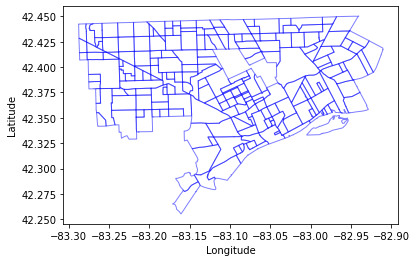

In [9]:
#plt.figure(figsize=(7,5))
#plt.scatter(tweets["lng"], tweets["lat"], s=1, c="r", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
for neighbor in detroit.boundaries.values():
    plt.plot(*neighbor.exterior.xy, lw=1, c="b", alpha=0.5)
plt.show()

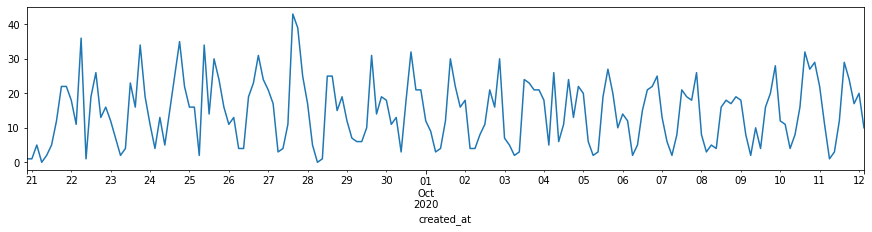

In [10]:
# Entire city tweets time series
city_tweets_ts = data_proc.time_groupby(tweets, "id_str", freq="180Min")
plt.figure(figsize=(15,3))
city_tweets_ts.sum(axis=1).plot()
plt.show()

<Figure size 1080x216 with 0 Axes>

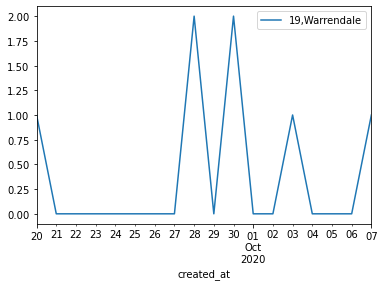

In [11]:
# Tweets ONE neighborhood
# selected neighborhood
nhood = "19,Warrendale"
nhood_ts = data_proc.time_groupby(tweets, 
                                  col="id_str",
                                  agg="count",
                                  nhoods=[nhood],
                                  freq="1440Min")
plt.figure(figsize=(15,3))
nhood_ts.iloc[-160:].plot()
plt.show()

Note that the amount of tweets in a neighborhood is very low. This is like due to the fact that only a very small portion of Twitter users actually have their geo-tagged feature enable. Therefore, it appears that tweets count can not be used in analysis.